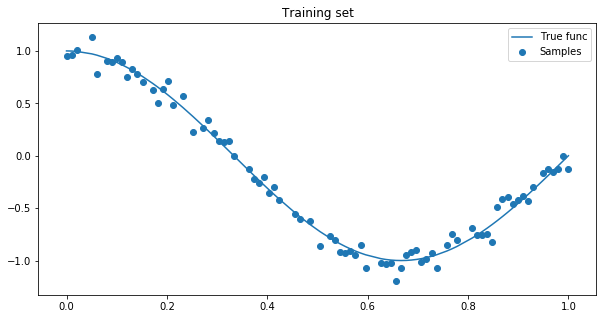

In [166]:
# generate data

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

def f(X):
    return np.cos(1.5 * np.pi * X)

m = 100
X = np.linspace(0, 1, m)
y = f(X) + np.random.randn(m) * 0.07

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# plot the data
plt.figure(figsize=(10, 5))

plt.title('Training set')
plt.scatter(X_train, y_train, label='Samples')
plt.plot(np.sort(X_train), f(np.sort(X_train)), label='True func')
plt.legend()

degree = 1	R^2 score = 0.666818013589535
degree = 3	R^2 score = 0.9881421936991894
degree = 33	R^2 score = 0.957893062649744


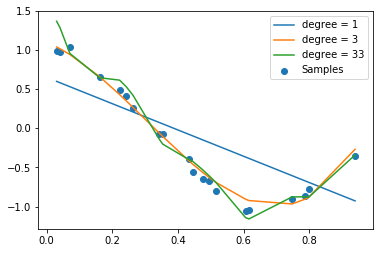

In [167]:
# find proper polynomial degree

import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures


for degree in [1, 3, 33]:
    poly = PolynomialFeatures(degree=degree)

    # learn the parameters
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    model = linear_model.LinearRegression().fit(X_train_poly, y_train)

    # predict
    X_test_poly = poly.fit_transform(X_test.reshape(-1, 1))
    y_predict = model.predict(X_test_poly)

    # run metrics
    print(f'degree = {degree}\tR^2 score = {r2_score(y_test, y_predict)}')

    # plot the prediction
    testSet_sorted = sorted(zip(X_test, y_predict), key=lambda i: i[0])
    plt.plot(*zip(*testSet_sorted), label=f'degree = {degree}')

plt.scatter(X_test, y_test, label='Samples')
plt.legend()